In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from myconfig import ROOT_DIR, DATASET_DIR

In [2]:
%matplotlib inline

In [3]:
conditions = pd.read_csv(DATASET_DIR/'01-simulation01'/'conditions.tsv', sep='\t')
best_param_dist = pd.read_csv(ROOT_DIR/'results'/'simulaton-param-dist.tsv', sep='\t', index_col=0)

In [4]:
default = conditions.iloc[0]

cond_groups = {
    key: pd.concat([
        default.to_frame().T, 
        conditions[conditions[key] != default[key]]
    ]).sort_values(by=key)
    for key in ['lmax', 'ncat', 'ntips', 'nOGs']
}

In [5]:
mm = 1 / 25.4
panel_cols = ['lmax', 'ncat', 'ntips', 'nOGs']
panel_rows = ['cpy_change_rates', 'cat_switch_rates', 'cpy_root_probs', 'cat_root_probs']

xlabels = dict(
    lmax  = '$l_\mathrm{max}$ (max copy)', 
    ncat  = '$K$ (#categories)', 
    nOGs  = '$N$ (#OGs)', 
    ntips = '$D$ (#tips)', 
)
ylabels = dict(
    cpy_change_rates=r'MAPE: $\langle |r_\mathrm{est.} - r_\mathrm{true}| / |r_\mathrm{true}| \rangle$', 
    cat_switch_rates=r'MAPE: $\langle |s_\mathrm{est.} - s_\mathrm{true}| / |s_\mathrm{true}| \rangle$', 
    cpy_root_probs=r'$\langle \mathrm{EMD}(\pi_\mathrm{est.}, \pi_\mathrm{true}) \rangle$', 
    cat_root_probs=r'$\mathrm{EMD}(\phi_\mathrm{est.}, \phi_\mathrm{true})$'
)


In [6]:
conditions

,conditionID,lmax,ncat,ntips,nOGs
0,cond01,2,3,128,4000
1,cond02,2,3,32,4000
2,cond03,2,3,64,4000
3,cond04,2,3,256,4000
4,cond05,2,3,512,4000
5,cond06,2,3,128,1000
6,cond07,2,3,128,2000
7,cond08,2,3,128,8000
8,cond09,2,3,128,16000
9,cond10,2,1,128,4000


In [7]:
for name in panel_rows:
    display(name, best_param_dist.groupby('conditionID')[name].describe())

'cpy_change_rates'

,count,mean,std,min,25%,50%,75%,max
conditionID,,,,,,,,
cond01,10.0,0.035744,0.015049,0.021231,0.027182,0.030768,0.039677,0.072532
cond02,10.0,0.245669,0.120890,0.070225,0.155049,0.251376,0.321145,0.477750
cond03,10.0,0.066415,0.037632,0.037297,0.041746,0.052524,0.073849,0.158505
cond04,10.0,0.016298,0.004408,0.011402,0.013643,0.015066,0.017887,0.026071
cond05,10.0,0.013050,0.007234,0.005798,0.010172,0.011297,0.012370,0.032577
cond06,10.0,0.081379,0.040404,0.049784,0.058062,0.073297,0.085439,0.188592
cond07,10.0,0.059550,0.050509,0.018289,0.041748,0.047273,0.049660,0.200333
cond08,10.0,0.020555,0.005999,0.012715,0.015562,0.019969,0.025742,0.029087
cond09,10.0,0.014272,0.004063,0.008801,0.011782,0.013188,0.016436,0.021109


'cat_switch_rates'

,count,mean,std,min,25%,50%,75%,max
conditionID,,,,,,,,
cond01,10.0,1.094840,1.309690,0.199413,0.426612,0.603413,1.098081,4.598207
cond02,10.0,2.715435,1.268176,1.313333,1.684496,2.620061,3.332728,5.407755
cond03,10.0,2.246431,2.911113,0.635734,0.918530,1.384778,1.497757,10.311060
cond04,10.0,0.316054,0.144783,0.154531,0.195986,0.299907,0.415234,0.574844
cond05,10.0,0.307797,0.198008,0.108314,0.171258,0.228410,0.391275,0.704185
cond06,10.0,1.209469,0.872698,0.412258,0.659166,0.915504,1.330051,3.156860
cond07,10.0,0.730744,0.332783,0.395410,0.494021,0.669491,0.790697,1.532368
cond08,10.0,0.359565,0.100943,0.184768,0.319693,0.344120,0.407268,0.566839
cond09,10.0,0.479758,0.323727,0.110535,0.247615,0.393555,0.669983,1.139268


'cpy_root_probs'

,count,mean,std,min,25%,50%,75%,max
conditionID,,,,,,,,
cond01,10.0,0.047316,0.021495,0.017777,0.030179,0.049729,0.056062,0.080925
cond02,10.0,0.163872,0.065393,0.078428,0.113156,0.141820,0.233570,0.240354
cond03,10.0,0.060710,0.029606,0.022744,0.037741,0.061454,0.073079,0.123292
cond04,10.0,0.027028,0.015864,0.015850,0.019058,0.021283,0.027961,0.070138
cond05,10.0,0.026812,0.011223,0.014389,0.017927,0.024954,0.032209,0.050835
cond06,10.0,0.150259,0.105168,0.048617,0.078535,0.105173,0.198570,0.326596
cond07,10.0,0.088704,0.085444,0.019143,0.037893,0.050340,0.111025,0.267278
cond08,10.0,0.026991,0.009573,0.014038,0.020400,0.026071,0.034406,0.042251
cond09,10.0,0.014596,0.005491,0.006537,0.010182,0.014474,0.017151,0.024112


'cat_root_probs'

,count,mean,std,min,25%,50%,75%,max
conditionID,,,,,,,,
cond01,10.0,0.029547,0.020092,0.009701,0.013193,0.023798,0.036088,0.066639
cond02,10.0,0.141874,0.074044,0.067479,0.097634,0.130807,0.163716,0.316443
cond03,10.0,0.041002,0.039975,0.008557,0.019270,0.029873,0.042411,0.143757
cond04,10.0,0.012926,0.007956,0.002735,0.007038,0.012002,0.017380,0.029137
cond05,10.0,0.009316,0.005051,0.002792,0.005912,0.008231,0.010283,0.018342
cond06,10.0,0.083131,0.103683,0.006837,0.020101,0.049881,0.100392,0.352226
cond07,10.0,0.063059,0.097110,0.003246,0.013380,0.027730,0.043826,0.319464
cond08,10.0,0.016396,0.008538,0.005237,0.011100,0.014855,0.019262,0.035031
cond09,10.0,0.010501,0.009851,0.000994,0.004841,0.008095,0.013889,0.034815


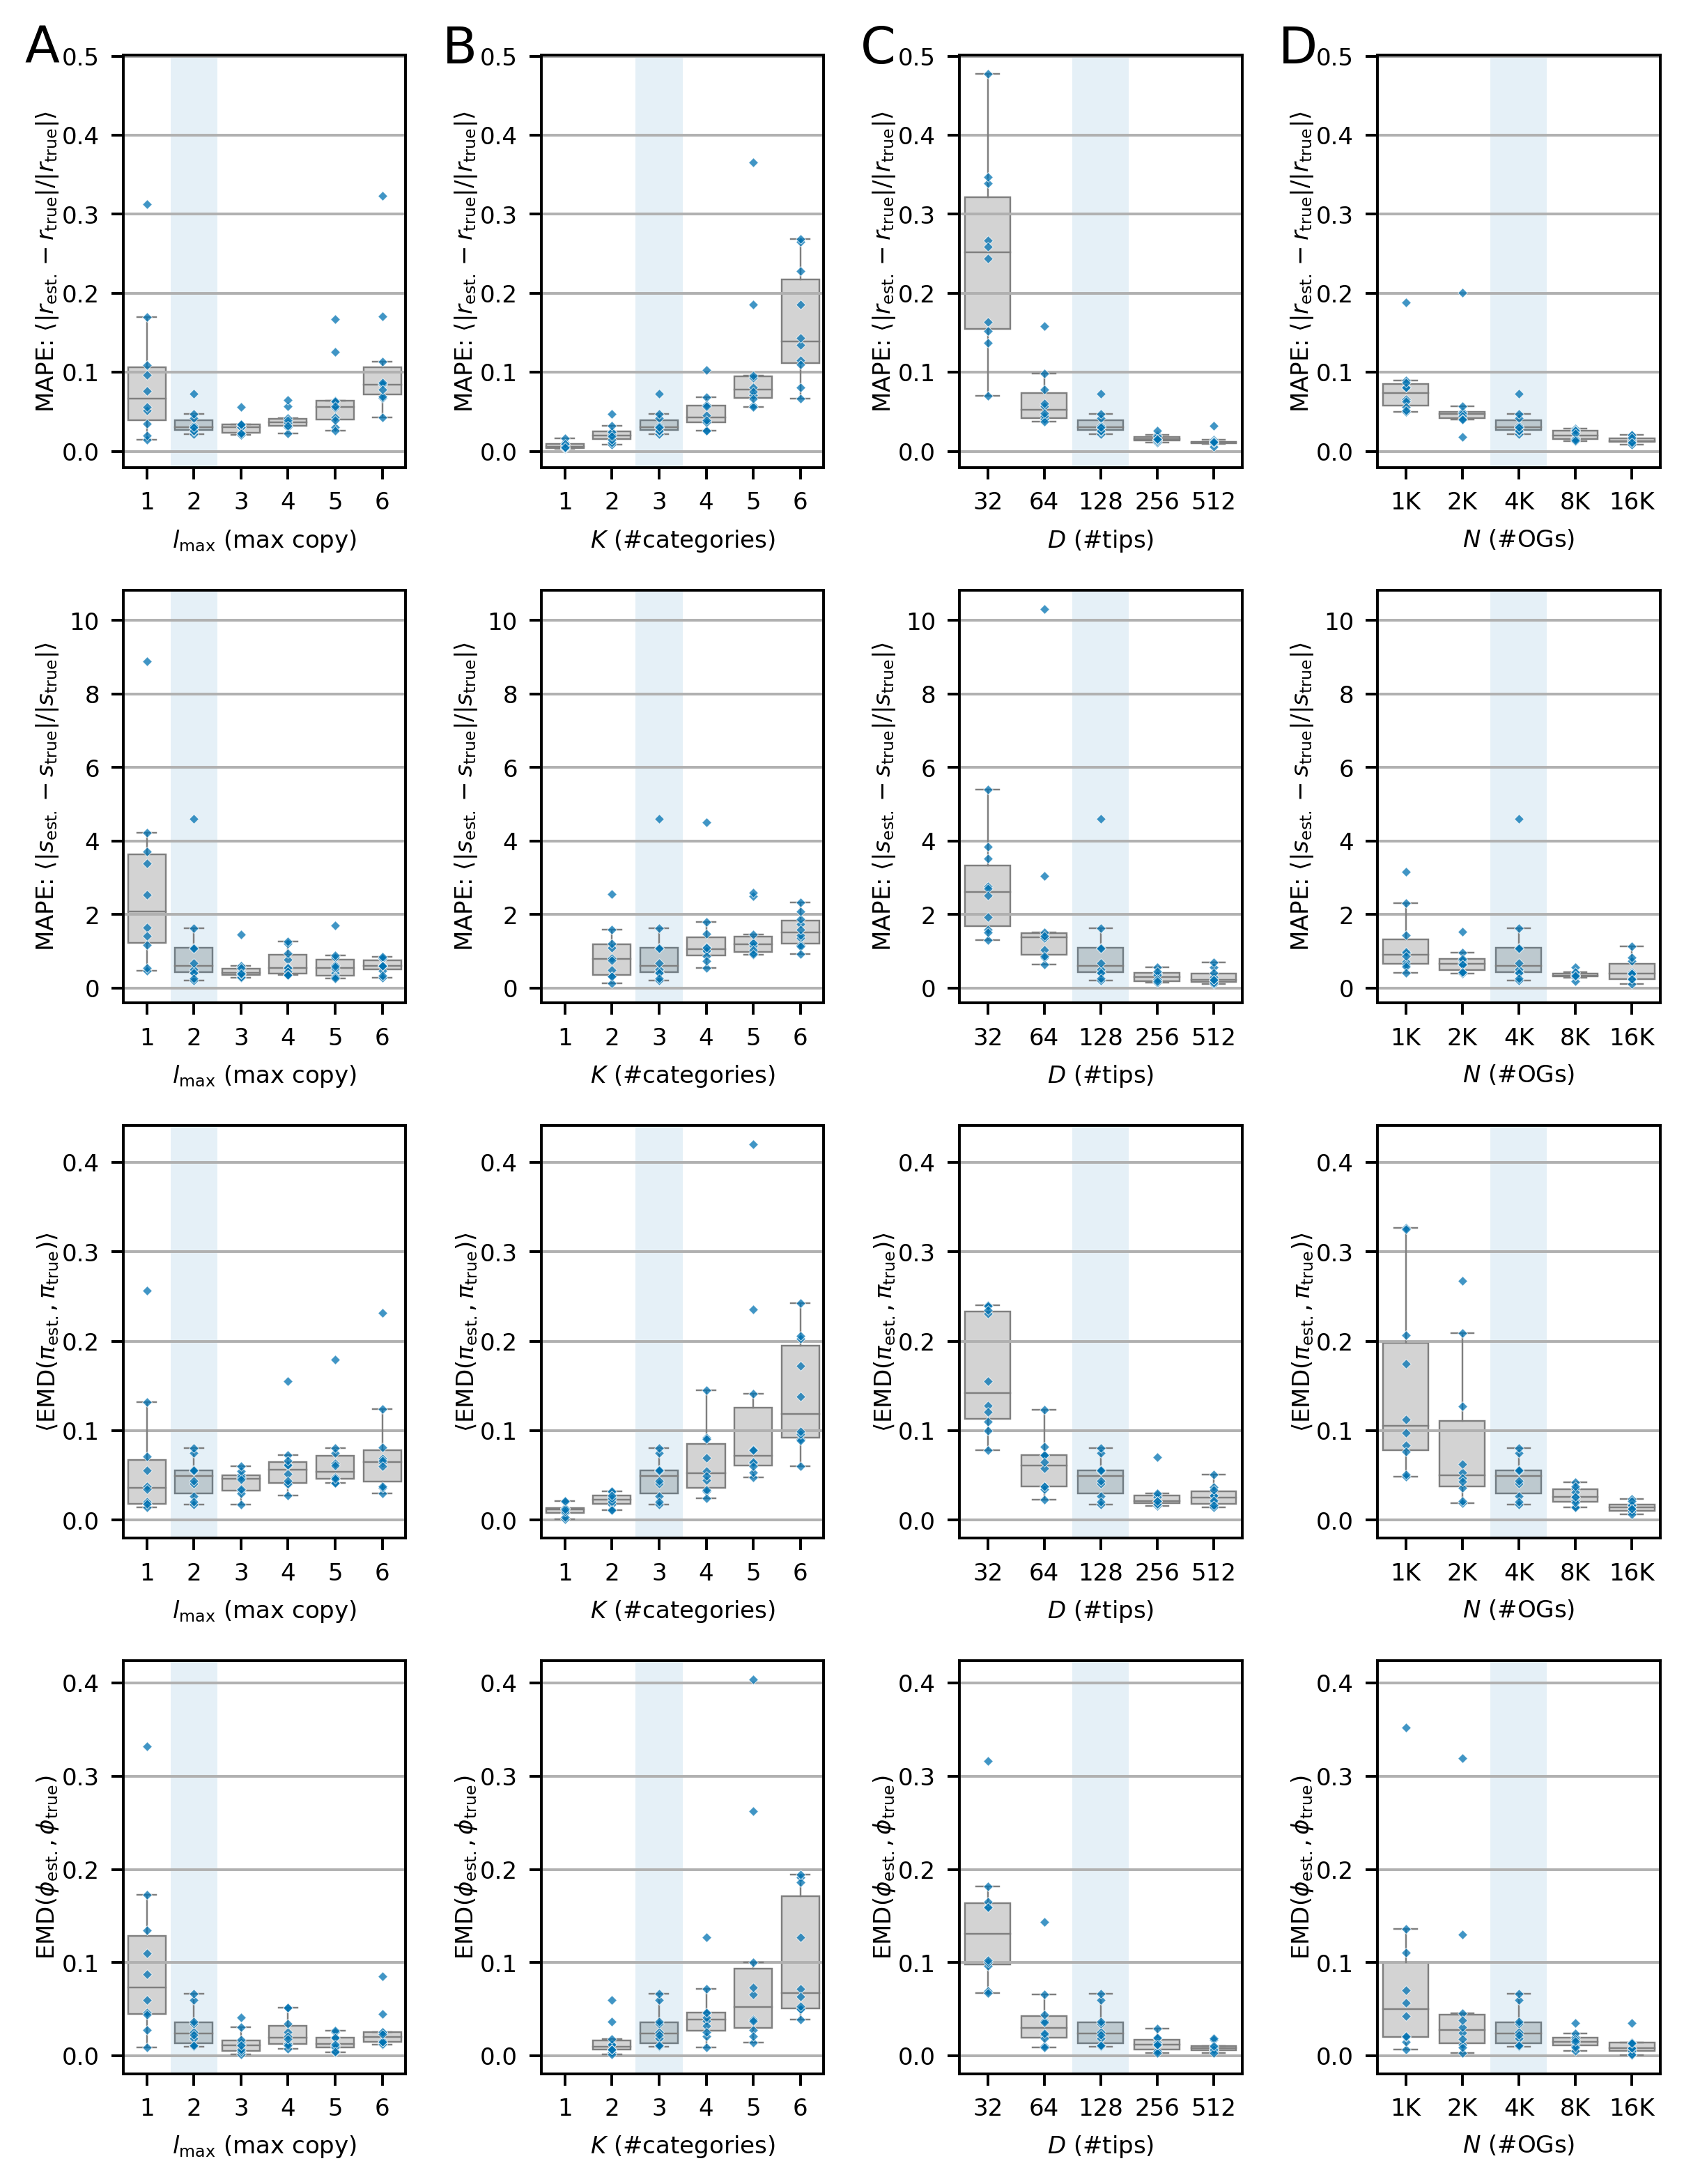

In [8]:
with plt.rc_context({'font.size': 7}):
    fig, axes = plt.subplots(
        len(panel_rows), len(panel_cols), sharex='col', sharey='row', 
        dpi=350, figsize=(178*mm, 230*mm), layout='tight'
    )
    for idx, key, axc in zip('ABCD', panel_cols, axes.T):
        cond_grp = cond_groups[key]

        data = best_param_dist[best_param_dist['conditionID'].isin(cond_grp['conditionID'])]

        for par, ax in zip(panel_rows, axc):
            sns.stripplot(
                data=data, x=key, y=par, order=cond_grp[key], 
                jitter=0, marker='D', color='#0072B2', edgecolor='w', linewidth=0.2, alpha=0.75, size=2, ax=ax,
            )
            sns.boxplot(
                data=data, x=key, y=par, order=cond_grp[key], 
                linewidth=0.5, color='lightgray', fliersize=0, ax=ax
            )

            dx = cond_grp[key].to_list().index(default[key])
            ax.axvspan(dx-0.5, dx+0.5, alpha=0.1, fc='#0072B2')
            ax.set_ylabel(ylabels[par], visible=True, labelpad=0.3)
            ax.set_xlabel(xlabels[key], visible=True)
            ax.xaxis.set_tick_params(labelbottom=True)
            ax.yaxis.set_tick_params(labelleft=True)
            ax.yaxis.grid()
            
            if key != 'nOGs':
                continue
            ax.set_xticklabels(cond_grp[key].astype(str).str.replace('000', 'K'))
                
        axc[0].text(-0.35, 0.98, idx, fontsize=15, transform=axc[0].transAxes)
    
    fig.align_ylabels()
    
fig.savefig('jpg/accuracy-param.jpg', bbox_inches='tight', dpi=350)
fig.savefig('png/accuracy-param.png', bbox_inches='tight', dpi=350)
fig.savefig('pdf/accuracy-param.pdf', bbox_inches='tight')